In [3]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from matplotlib import gridspec

import time
import pickle

import memory_profiler

%load_ext memory_profiler

from pathlib import Path

In [4]:
mpl.__version__

'3.5.1'

In [5]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [6]:
%load_ext autoreload
%autoreload 2

from pubmed_landscape_src.plotting import *

In [7]:
variables_path = Path("../../results/variables")
figures_path = Path("../../results/figures")
berenslab_data_path = Path(
    "/gpfs01/berens/data/data/pubmed_processed/embeddings/embeddings_luca"
)

In [8]:
plt.style.use("../matplotlib_style.txt")

# Fig S10 : Covid ablation experiment

## Import

In [9]:
mask_covid_2 = np.load(variables_path / "mask_covid_2.npy")

In [19]:
tsne_tfidf_reparsed = np.load(variables_path / "tsne_tfidf_reparsed.npy")

In [10]:
tsne_tfidf_without_covid_only = np.load(
    variables_path / "tsne_tfidf_without_covid_only.npy"
)

In [11]:
tsne_tfidf_without_covid = np.load(
    variables_path / "tsne_tfidf_without_covid.npy"
)

In [12]:
tsne_tfidf_covid_keywords_shuffled = np.load(
    variables_path / "tsne_tfidf_covid_keywords_shuffled.npy"
)

## Plot

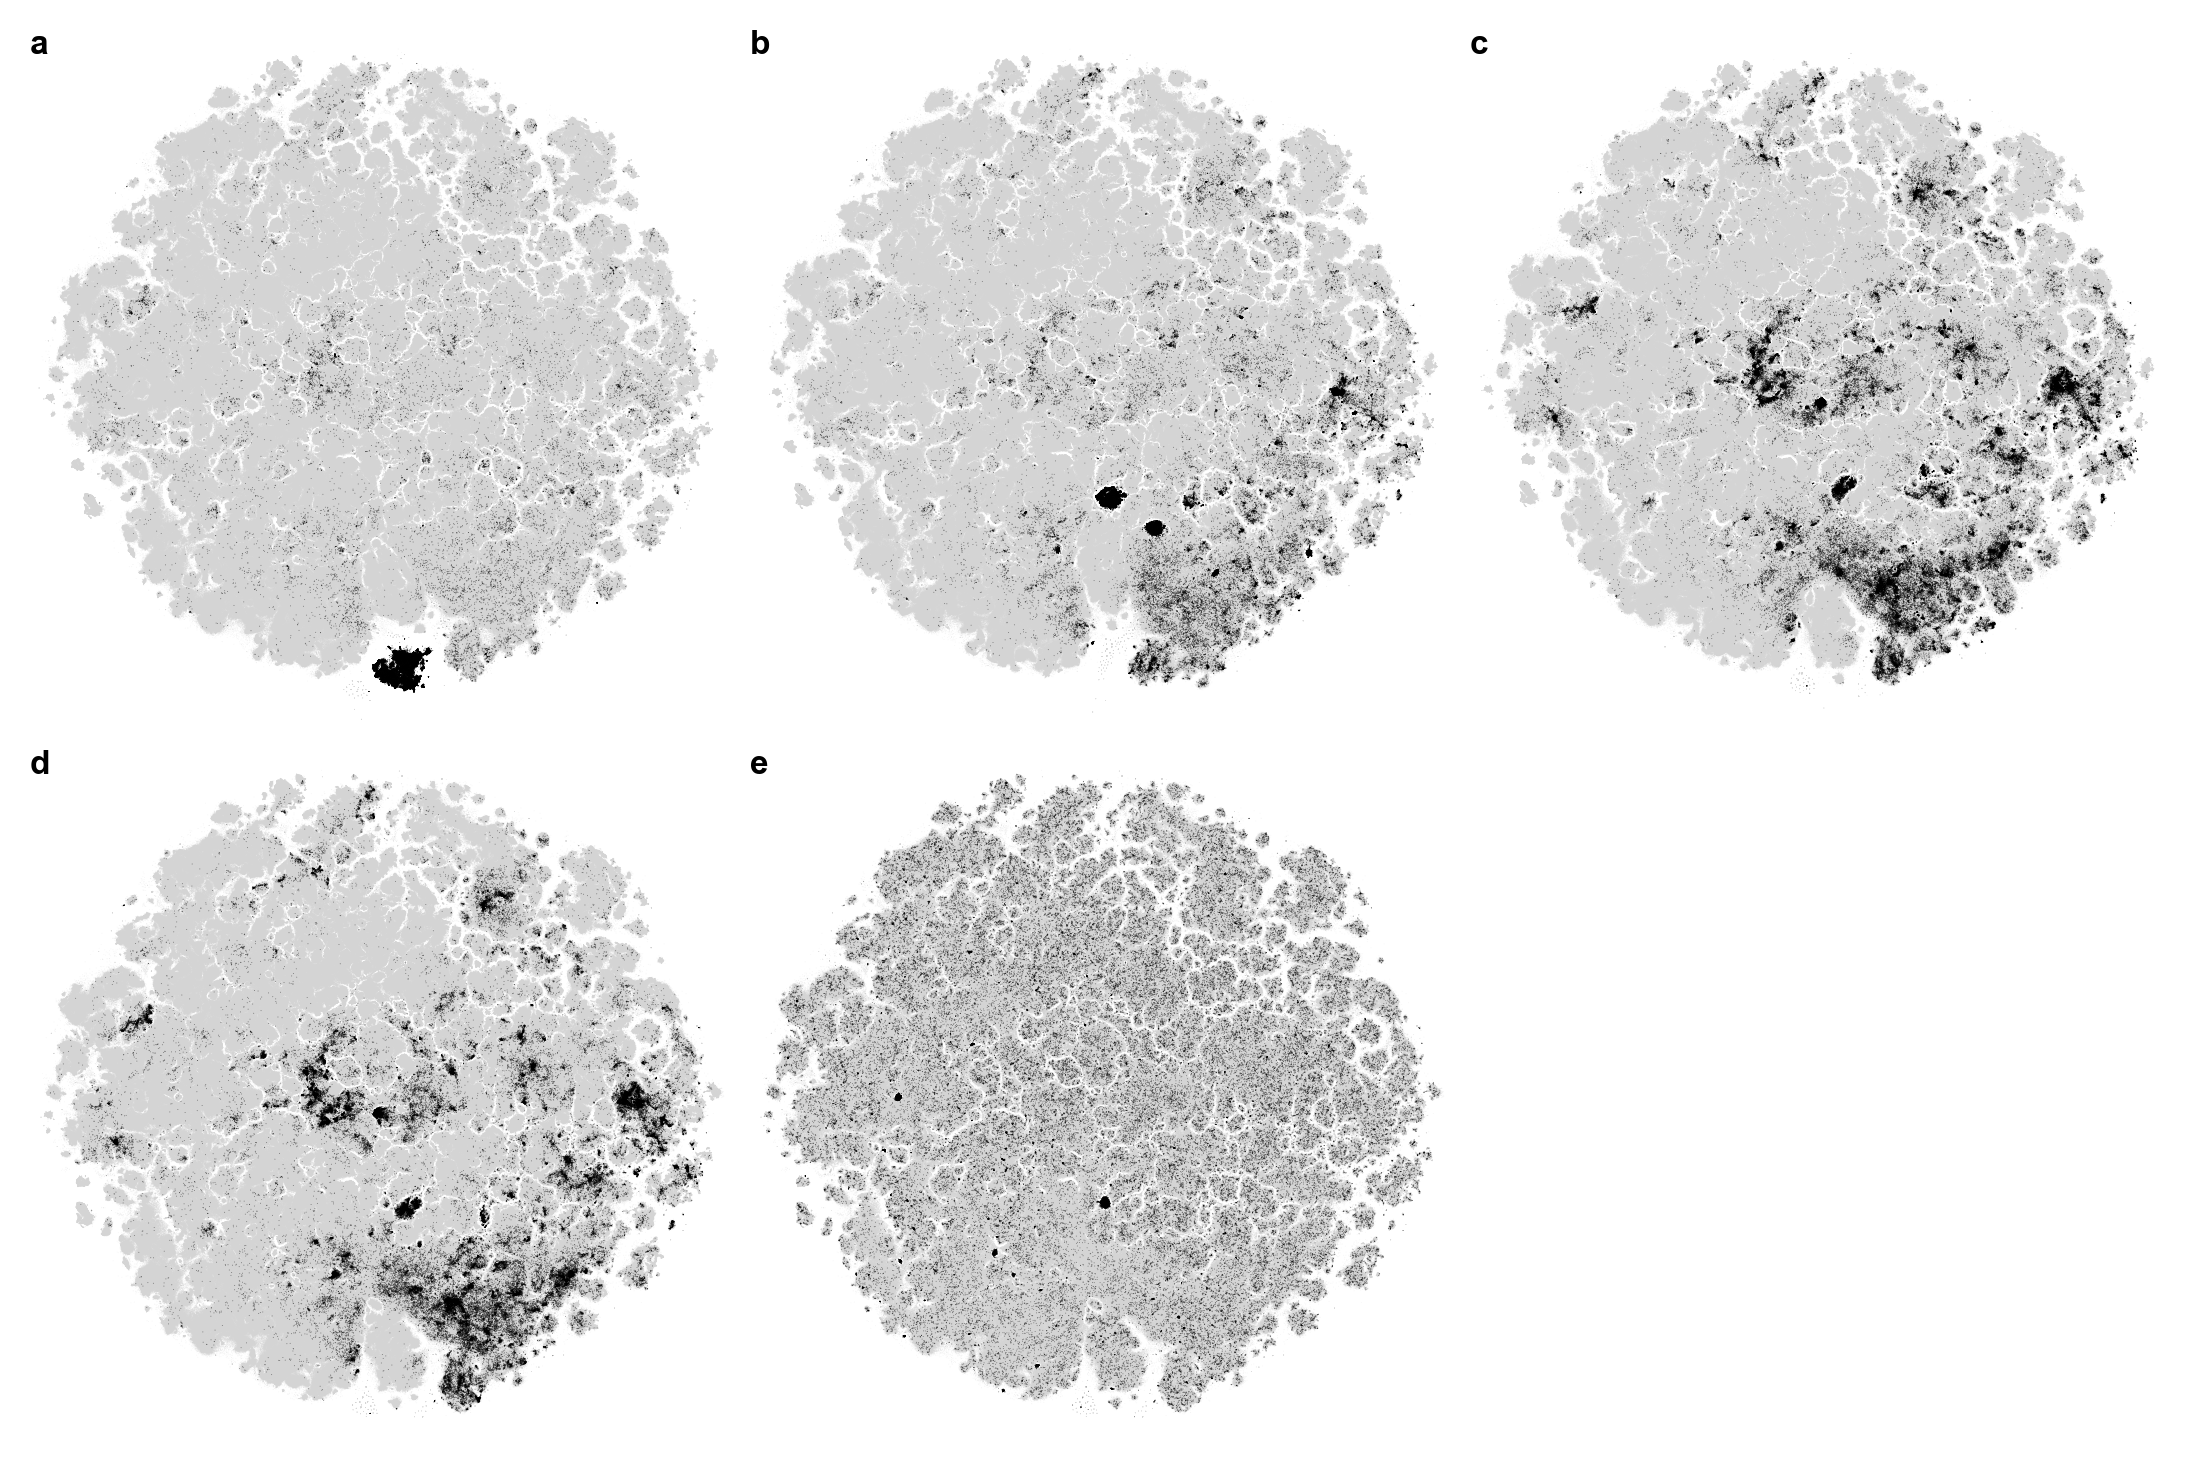

In [22]:
%matplotlib inline
fig, axs = plt.subplots(
    2, 3, figsize=(7.2, 4.8), dpi=300, layout="constrained"  # v2 4.8,4.8
)

txtkwargs = dict(size=8, weight="bold", va="top", ha="left")
x_lim = (-210, 210)
y_lim = (-210, 210)

# 1
tsne = tsne_tfidf_reparsed
subregion = tsne[mask_covid_2]
plot_tsne_zoom(
    tsne, mask_covid_2, x_lim, y_lim, ax=axs[0, 0], plot_type="subplot_2"
)
axs[0, 0].text(
    0, 1, string.ascii_lowercase[0], transform=axs[0, 0].transAxes, **txtkwargs
)


# 2
tsne = tsne_tfidf_without_covid_only
subregion = tsne[mask_covid_2]
plot_tsne_zoom(
    tsne, mask_covid_2, x_lim, y_lim, ax=axs[0, 1], plot_type="subplot_2"
)
axs[0, 1].text(
    0, 1, string.ascii_lowercase[1], transform=axs[0, 1].transAxes, **txtkwargs
)


# 3
tsne = tsne_tfidf_without_covid
subregion = tsne[mask_covid_2]
plot_tsne_zoom(
    tsne, mask_covid_2, x_lim, y_lim, ax=axs[0, 2], plot_type="subplot_2"
)
axs[0, 2].text(
    0, 1, string.ascii_lowercase[2], transform=axs[0, 2].transAxes, **txtkwargs
)

# 4
tsne = tsne_tfidf_covid_keywords_shuffled
subregion = tsne[mask_covid_2]
plot_tsne_zoom(
    tsne, mask_covid_2, x_lim, y_lim, ax=axs[1, 0], plot_type="subplot_2"
)
axs[1, 0].text(
    0, 1, string.ascii_lowercase[3], transform=axs[1, 0].transAxes, **txtkwargs
)

# 5
np.random.seed(42)
reorder = np.random.permutation(tsne_tfidf_covid_keywords_shuffled.shape[0])
tsne = tsne_tfidf_covid_keywords_shuffled
subregion = tsne[mask_covid_2[reorder]]
plot_tsne_zoom(
    tsne,
    mask_covid_2[reorder],
    x_lim,
    y_lim,
    ax=axs[1, 1],
    plot_type="subplot_2",
)
axs[1, 1].text(
    0, 1, string.ascii_lowercase[4], transform=axs[1, 1].transAxes, **txtkwargs
)

axs[1, 2].axis("off")

fig.savefig(figures_path / "fig_S10_covid_ablation.png", dpi=300)
fig.savefig(figures_path / "fig_S10_covid_ablation.pdf", dpi=300)